# **Kiva Loans**

#### **Column Descriptions**

- `id`: Unique ID for each loan (loan ID)  
- `funded_amount`: Amount disbursed by Kiva to the field partner (USD)  
- `loan_amount`: Amount distributed by the field partner to the borrower (USD)
  - `loan_amount` represents the amount of money requested by the borrower.  
  - `funded_amount` is usually equal to or less than `loan_amount`:  
    + Equal: If the full requested amount is successfully raised.  
    + Less: If the full amount is not raised, but Kiva decides to distribute the partially collected amount.  

- `activity`: More specific category of `sector`  
- `sector`: Loan category  
- `country`: Full country name where the loan is disbursed  
- `region`: Full region name within the `country`  
- `currency`: Currency used  
- `partner_id`: ID for the partner organization  
- `posted_time`: The time the loan was posted on Kiva by the field partner  
- `funded_time`: The time the loan was fully funded by lenders  
- `term_in_months`: Loan term duration (in months)  
- `lender_count`: The number of lenders contributing to the loan  
- `repayment_interval`: Loan repayment method

#### **Background**

AI Consulting Group is a leading consulting firm specializing in data-driven investment strategies. We specialize in providing expert guidance to investors seeking to optimize their investment portfolios through advanced analytics and in-depth market research. Our team of experts evaluates key industry trends, financial data, and market dynamics in order to identify investment opportunities with the highest potential. By leveraging data-driven insights, we help our clients minimize risks and maximize returns, ensuring informed and strategic investment decisions. Whether you are exploring opportunities in technology, healthcare, renewable energy, or emerging markets, AI Consulting Group delivers tailored recommendations to guide your investments with confidence.

#### **Problem Statement**

An angel lender came to AI Consulting Group seeking advice for their new venture—providing microloans to those in the F&B sector. In this venture, they want to offer loans with the highest potential for success and have therefore provided a dataset of historical loans issued by Kiva. The client has asked us to help identify which loans are most likely to succeed and to assist them in making informed investment decisions.

Driven by a commitment to making a positive impact, the client is not focused on profit but rather on supporting entrepreneurs who need financial assistance the most. By leveraging data-driven insights, market trends, and past lending patterns, we aim to identify the key factors that contribute to loan success. Our goal is to help the client maximize the effectiveness of their funding, ensuring that their goodwill reaches the most promising and deserving businesses in the food and beverage sector.

# **Exploratory Data Analysis (EDA)**

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from scipy.stats import wilcoxon, ttest_rel, pearsonr, mannwhitneyu, kruskal, chi2_contingency, spearmanr

import warnings
warnings.filterwarnings('ignore')

## **Import Dataset**

In [3]:
df = pd.read_csv('Assets/kiva_loan.csv')

## **Data Understanding**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [5]:
df.shape

(671205, 15)

In [6]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country', 'region', 'currency', 'partner_id', 'posted_time',
       'funded_time', 'term_in_months', 'lender_count', 'repayment_interval'],
      dtype='object')

In [7]:
df.describe(include=['int64', 'float64']).drop(columns=['id','partner_id'])

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


## **Missing Values**

In [8]:
df.dropna(subset=['use', 'partner_id'], inplace=True)

In [9]:
df['region'] = df['region'].fillna('Not Specified')

In [10]:
df.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                       0
country                   0
region                    0
currency                  0
partner_id                0
posted_time               0
funded_time           45687
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

## **Duplicates**

In [11]:
df.duplicated().sum()

0

## **Univariate Analysis**

`activity`

In [12]:
df['activity'].value_counts().head(25)

Farming                      72621
General Store                63105
Personal Housing Expenses    32295
Food Production/Sales        27210
Pigs                         26516
Agriculture                  24634
Retail                       24349
Clothing Sales               22194
Home Appliances              20250
Higher education costs       19622
Fruits & Vegetables          16498
Grocery Store                13568
Livestock                    13056
Fish Selling                 13037
Food                         10111
Fishing                      10044
Poultry                       9686
Tailoring                     9635
Animal Sales                  9212
Food Stall                    8811
Sewing                        8359
Cereals                       7883
Dairy                         7847
Cattle                        7834
Services                      7204
Name: activity, dtype: int64

`sector`

In [13]:
df['sector'].value_counts()

Agriculture       177166
Food              133268
Retail            121326
Services           41563
Personal Use       36246
Housing            33539
Clothing           30823
Education          30681
Transportation     15248
Arts               11580
Health              9009
Manufacturing       6137
Construction        6027
Entertainment        656
Wholesale            621
Name: sector, dtype: int64

`use`

In [14]:
df['use'].value_counts().head(10)

to buy a water filter to provide safe drinking water for their family.    5217
to buy a water filter to provide safe drinking water for her family.      4082
To buy a water filter to provide safe drinking water for their family.    2141
to build a sanitary toilet for her family.                                1708
to build a sanitary toilet for her family                                 1599
to buy ingredients for her food production business                       1419
to purchase more groceries to sell.                                       1409
to buy feed and other supplies to raise her pigs.                         1405
to buy fertilizers and other farm supplies.                               1280
to buy a water filter to provide safe drinking water for his family.      1261
Name: use, dtype: int64

`country`

In [15]:
df['country'].value_counts().head(10)

Philippines    160361
Kenya           67106
El Salvador     39320
Cambodia        34809
Pakistan        26853
Peru            22179
Colombia        21218
Uganda          20390
Tajikistan      19518
Ecuador         13487
Name: country, dtype: int64

`term_in_months`

In [16]:
df['term_in_months'].value_counts().head(10)

14.0    165844
8.0     142519
11.0     40609
7.0      32418
13.0     30318
20.0     28199
15.0     24952
12.0     24932
6.0      24418
26.0     23205
Name: term_in_months, dtype: int64

`lender_count`

In [17]:
df['lender_count'].value_counts().head(10)

8     33616
7     31921
9     31863
1     31422
5     29727
6     28757
10    27570
11    25316
12    24780
4     23977
Name: lender_count, dtype: int64

`repayment_interval`

In [18]:
df['repayment_interval'].value_counts()

monthly      334195
irregular    252039
bullet        67656
Name: repayment_interval, dtype: int64

## **Bivariate Analysis**

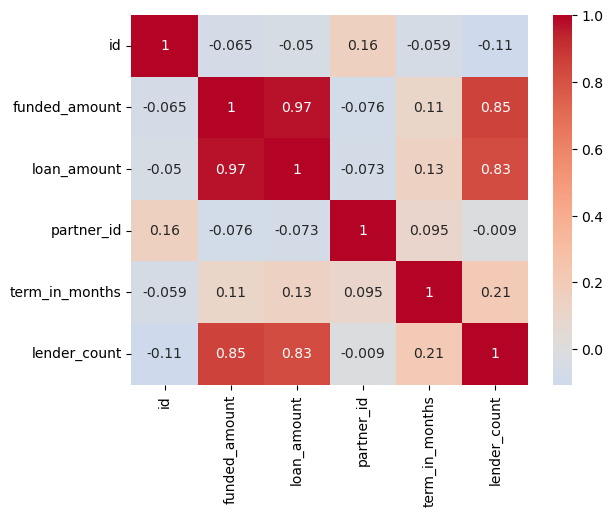

In [19]:
sns.heatmap(df.corr(), annot=True, center=0, cmap='coolwarm')
plt.show()

In [20]:
df[df['sector'] == 'Food']['activity'].value_counts()

Food Production/Sales         27210
Fruits & Vegetables           16498
Grocery Store                 13568
Fish Selling                  13037
Food                          10111
Fishing                       10044
Food Stall                     8811
Cereals                        7883
Food Market                    7049
Restaurant                     4554
Bakery                         3579
Beverages                      2330
Butcher Shop                   1943
Milk Sales                     1770
Liquor Store / Off-License     1545
Cafe                           1389
Pub                             895
Catering                        649
Cheese Making                   342
Balut-Making                     61
Name: activity, dtype: int64

In [21]:
rep_interval = df.groupby('repayment_interval')[['loan_amount', 'funded_amount']].sum().reset_index()
rep_interval['ratio'] = rep_interval['funded_amount'] / rep_interval['loan_amount']
rep_interval.sort_values('ratio', ascending=False)

,repayment_interval,loan_amount,funded_amount,ratio
1,irregular,175725200.0,171173975.0,0.974100
2,monthly,303270600.0,283317200.0,0.934206
0,bullet,53311150.0,48697550.0,0.913459


In [22]:
df.groupby('term_in_months')['loan_amount'].count().reset_index().sort_values('loan_amount', ascending=False).head(10).rename(columns={'loan_amount': 'borrower_count'})

,term_in_months,borrower_count
12,14.0,165844
6,8.0,142519
9,11.0,40609
5,7.0,32418
11,13.0,30318
18,20.0,28199
13,15.0,24952
10,12.0,24932
4,6.0,24418
24,26.0,23205


In [23]:
df.groupby('country')[['funded_amount','loan_amount']].sum().reset_index().sort_values('funded_amount', ascending=False).head(10)

,country,funded_amount,loan_amount
58,Philippines,54438075.0,55301500.0
33,Kenya,30426875.0,32636750.0
57,Peru,30302100.0,30708825.0
56,Paraguay,29297650.0,29514025.0
22,El Salvador,23059975.0,26251050.0
11,Cambodia,18784825.0,19840425.0
7,Bolivia,18210725.0,19695725.0
59,Rwanda,15473975.0,16614275.0
20,Ecuador,14568600.0,14949700.0
76,Uganda,14039000.0,15209525.0


## **Outlier Detection**

`funded_amount`

In [24]:
q1 = df['funded_amount'].quantile(0.25)
q3 = df['funded_amount'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print(f'lower bound for the funded amount is {lb}')
print(f'upper bound for the funded amount is {ub}')

lower bound for the funded amount is -725.0
upper bound for the funded amount is 1875.0


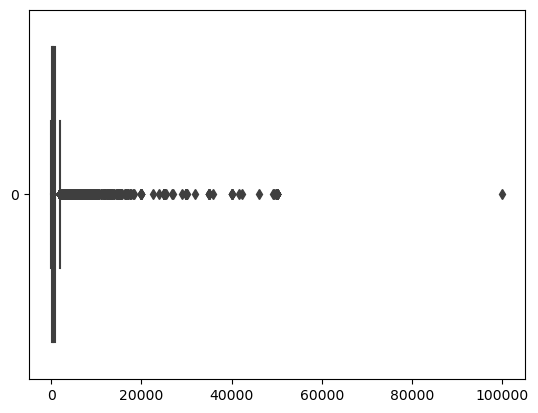

In [25]:
sns.boxplot(df['funded_amount'], orient='h')
plt.show()

`loan_amount`

In [26]:
q1 = df['loan_amount'].quantile(0.25)
q3 = df['loan_amount'].quantile(0.75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print(f'lower bound for the loan amount is {lb}')
print(f'upper bound for the loan amount is {ub}')

lower bound for the loan amount is -775.0
upper bound for the loan amount is 2025.0


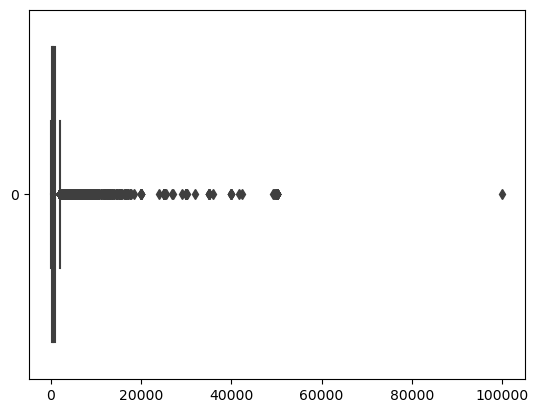

In [27]:
sns.boxplot(df['loan_amount'], orient='h')
plt.show()

## **Feature Engineering**

### **Create New Sample Dataset**

In [28]:
kf = df[df['sector'] == 'Food']
kf.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular


### **Drop & Reorder Columns**

In [29]:
kf = kf.drop(columns=['id','partner_id', 'currency', 'sector'])
kf.head(1)

,funded_amount,loan_amount,activity,use,country,region,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,300.0,300.0,Fruits & Vegetables,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular


In [30]:
kf = kf[[ 
    'country', 'region', 'activity', 'use',
    'loan_amount', 'funded_amount',                     
    'term_in_months', 'repayment_interval', 'lender_count',  
    'posted_time', 'funded_time'                         
]]

kf.head(1)

,country,region,activity,use,loan_amount,funded_amount,term_in_months,repayment_interval,lender_count,posted_time,funded_time
0,Pakistan,Lahore,Fruits & Vegetables,"To buy seasonal, fresh fruits to sell.",300.0,300.0,12.0,irregular,12,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00


### **Change Data Types**

In [31]:
kf[['posted_time', 'funded_time']] = kf[['posted_time', 'funded_time']].apply(pd.to_datetime)

In [32]:
kf['repayment_interval'] = kf['repayment_interval'].str.capitalize()

In [33]:
colToCategory = ['country', 'region', 'activity', 'use', 'repayment_interval']
for col in colToCategory:
    if col in kf.columns:
        kf[col] = kf[col].astype('category')

In [34]:
kf['posted_time'] = kf['posted_time'].dt.tz_localize(None)
kf['funded_time'] = kf['funded_time'].dt.tz_localize(None)

### **Create New Features**

In [35]:
kf['days_to_disbursement'] = kf['funded_time'] - kf['posted_time']

In [36]:
kf['days_to_disbursement'] = (kf['days_to_disbursement'].dt.total_seconds() / 86400).round(2)

In [37]:
kf['days_to_disbursement'].describe()

count    125602.000000
mean         13.608905
std          11.369806
min           0.000000
25%           4.990000
50%           9.190000
75%          21.040000
max          71.220000
Name: days_to_disbursement, dtype: float64

In [38]:
kf['funding_ratio'] = kf['funded_amount'] / kf['loan_amount']

In [39]:
kf['monthly_payment'] = kf['funded_amount'] / kf['term_in_months']

In [40]:
kf['avg_contribution_amount'] = kf['funded_amount'] / kf['lender_count']

In [41]:
kf = kf[[ 
    'country', 'region', 'activity', 'use', 'repayment_interval',
    'loan_amount', 'funded_amount', 'funding_ratio',                     
    'term_in_months', 'monthly_payment', 'lender_count', 'avg_contribution_amount',  
    'posted_time', 'funded_time', 'days_to_disbursement'                         
]]

kf.head(1)

,country,region,activity,use,repayment_interval,loan_amount,funded_amount,funding_ratio,term_in_months,monthly_payment,lender_count,avg_contribution_amount,posted_time,funded_time,days_to_disbursement
0,Pakistan,Lahore,Fruits & Vegetables,"To buy seasonal, fresh fruits to sell.",Irregular,300.0,300.0,1.0,12.0,25.0,12,25.0,2014-01-01 06:12:39,2014-01-02 10:06:32,1.16


## **Inferential Statistics**

#### **Is There a Significant Difference Between Loaned and Funded Amounts?**

- $H_0$ : There is no significant difference between the loan amount and the funded amount.
    + On average, lenders usually fund the full requested amount.
- $H_1$ : There is a significant difference between the loan amount and the funded amount.
    + Loans are often not fully funded or funded inconsistently.

In [42]:
stat, p_value = wilcoxon(kf['loan_amount'], kf['funded_amount'])

print(f"Wilcoxon Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between loaned and funded amounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Wilcoxon Statistic: 0.0, P-Value: 0.0
Reject the null hypothesis: There is a significant difference between loaned and funded amounts.


#### **Is Lender Count Related to Disbursement Time?**
- $H_0$ : There is no significant difference in disbursement time between loans with a low lender count and those with a high lender count.
    + The number of lenders does not influence how quickly loans are disbursed.
- $H_1$ : There is a significant difference in disbursement time based on lender count.
    + Loans with more lenders may be disbursed faster/slower than those with fewer lenders.

In [43]:
lenderMedian = np.median(kf['lender_count'])

lowLenderCount = kf[kf['lender_count'] <= lenderMedian]['days_to_disbursement'].dropna()
highLenderCount = kf[kf['lender_count'] > lenderMedian]['days_to_disbursement'].dropna()

stat, p_value = mannwhitneyu(lowLenderCount, highLenderCount, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Lender count significantly affects disbursement time.")
else:
    print("Fail to reject the null hypothesis: No significant difference in disbursement time based on lender count.")

Mann-Whitney U Statistic: 1139009465.5, P-Value: 0.0
Reject the null hypothesis: Lender count significantly affects disbursement time.


#### **Does Lender Count Impact Loan Disbursement Time?**

- **$H_0$**: There is no significant difference in disbursement time between loans with a high lender count and those with a low lender count.  
    + The number of lenders does not influence how quickly a loan is disbursed.  

- **$H_1$**: There is a significant difference in disbursement time between loans with a high lender count and those with a low lender count.  
    + Loans with a higher or lower number of lenders experience different disbursement times.

In [44]:
disbursementByCountry = [kf[kf['country'] == country]['days_to_disbursement'].dropna().values for country in kf['country'].unique()]

stat, p_value = kruskal(*disbursementByCountry)

print(f"Kruskal-Wallis Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one country has a significantly different disbursement time.")
else:
    print("Fail to reject the null hypothesis: No significant difference in disbursement times across countries.")

Kruskal-Wallis Statistic: 15583.624174560116, P-Value: 0.0
Reject the null hypothesis: At least one country has a significantly different disbursement time.


#### **Is Repayment Interval Dependent on Country?**

- **$H_0$**: There is no significant relationship between a country's location and its preferred repayment interval.  
    + Repayment intervals are distributed similarly across all countries.  

- **$H_1$**: Repayment interval varies significantly by country.  
    + At least one country has a distinct repayment interval preference compared to others.

In [45]:
contingency_table = pd.crosstab(kf['country'], kf['repayment_interval'])
stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one country has a significantly different repayment interval.")
else:
    print("Fail to reject the null hypothesis: No significant difference in repayment intervals across countries.")

Chi-Square Statistic: 134233.99186638527, P-Value: 0.0
Reject the null hypothesis: At least one country has a significantly different repayment interval.


#### **Is There a Correlation Between Loan Amount and Disbursement Time?**  

- **$H_0$**: There is no significant correlation between loan amount and the number of days to disbursement.  
    + The size of the loan does not influence how long it takes to be disbursed.  

- **$H_1$**: There is a significant correlation between loan amount and the number of days to disbursement.  
    + Larger or smaller loan amounts may impact the disbursement time.

In [46]:
days = kf.dropna(subset=['days_to_disbursement'])

stat, p_value = spearmanr(days['loan_amount'], days['days_to_disbursement'])
print(f"Spearman Correlation: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between loan amount and days to disbursement.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found between loan amount and days to disbursement.")

Spearman Correlation: 0.3399900528526716, P-Value: 0.0
Reject the null hypothesis: There is a significant correlation between loan amount and days to disbursement.


## **Visualization**

### **Average Contribution**

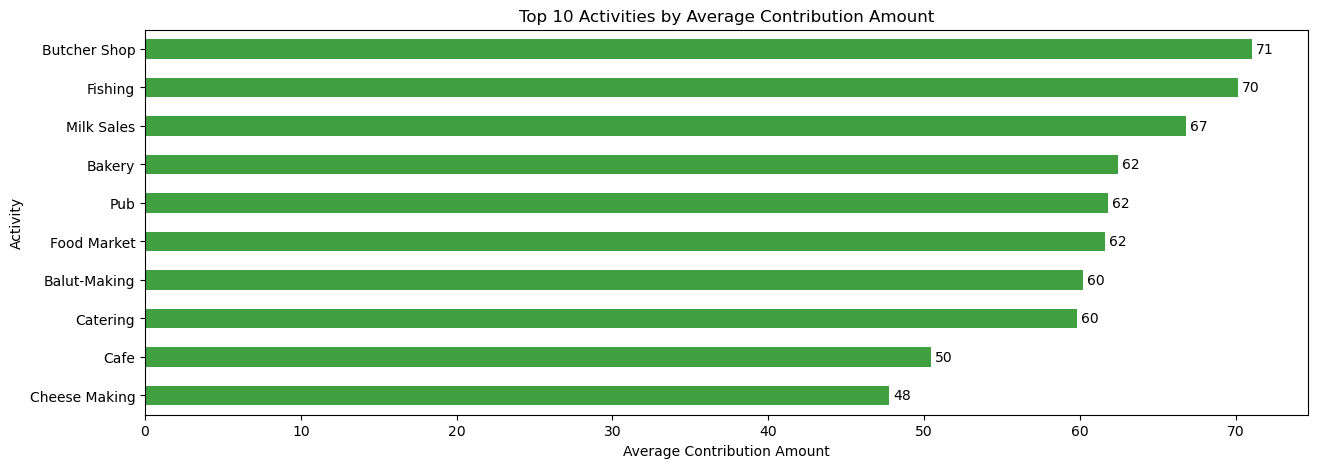

In [162]:
contByActivity = kf.groupby('activity')[['avg_contribution_amount']].mean().sort_values('avg_contribution_amount', ascending=True).head(10).plot(kind='barh',
                                                                                                                                                  color='green',
                                                                                                                                                  alpha=0.75,
                                                                                                                                                  figsize=(15, 5))
contByActivity.legend().remove()
plt.title("Top 10 Activities by Average Contribution Amount")
plt.ylabel("Activity")
plt.xlabel("Average Contribution Amount")

contByActivity.bar_label(contByActivity.containers[0], fmt="%.0f", label_type="edge", padding=3)

plt.show()

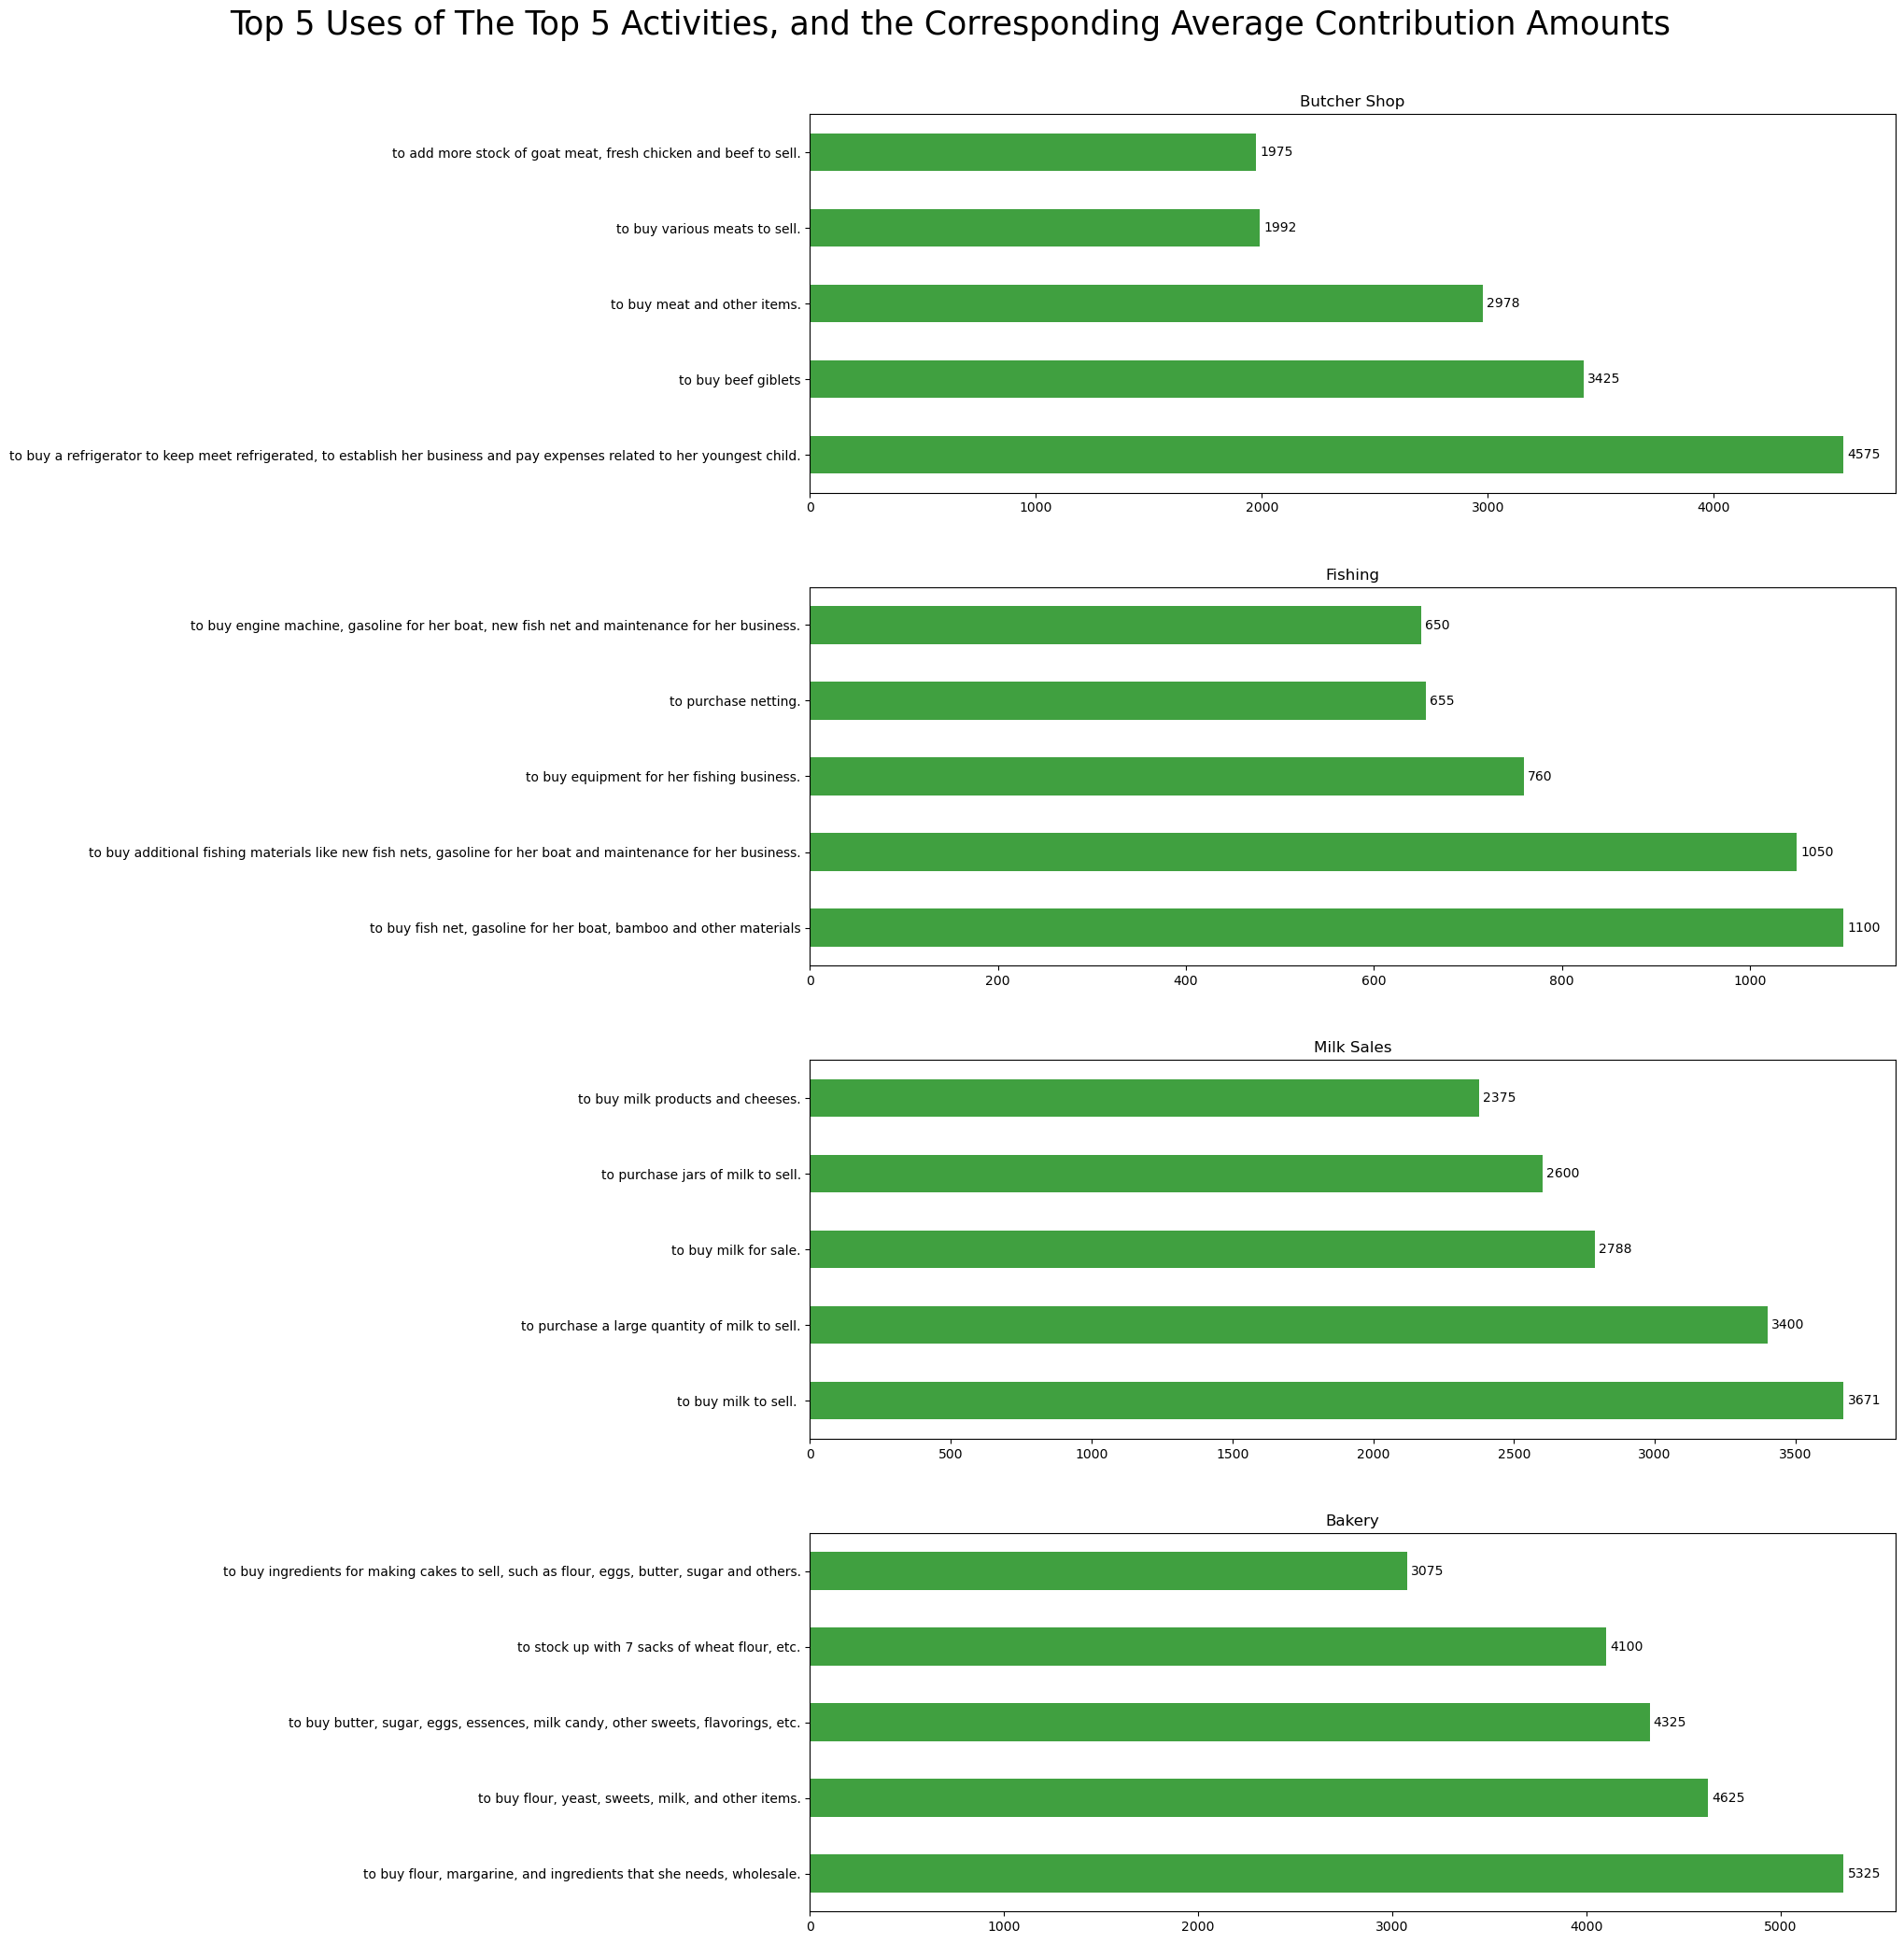

In [253]:
fig, axes = plt.subplots(4, 1, figsize=(15, 25))
fig.suptitle("Top 5 Uses of The Top 5 Activities, and the Corresponding Average Contribution Amounts", fontsize=25, x=0.225, y=0.925)

plt.subplots_adjust(hspace=0.25)

butcherUses = (
    kf[kf['activity'] == 'Butcher Shop']
    .groupby('use')[['avg_contribution_amount']]
    .mean()
    .sort_values('avg_contribution_amount', ascending=False)
    .head(5)
)
ax1 = butcherUses.plot(kind='barh', color='green', alpha=0.75, ax=axes[0])
ax1.legend().remove()
ax1.set_title("Butcher Shop")
ax1.set_ylabel("")
ax1.bar_label(ax1.containers[0], fmt="%.0f", label_type="edge", padding=3)

fishingUses = (
    kf[kf['activity'] == 'Fishing']
    .groupby('use')[['avg_contribution_amount']]
    .mean()
    .sort_values('avg_contribution_amount', ascending=False)
    .head(5)
)
ax2 = fishingUses.plot(kind='barh', color='green', alpha=0.75, ax=axes[1])
ax2.legend().remove()
ax2.set_title("Fishing")
ax2.set_ylabel("")
ax2.bar_label(ax2.containers[0], fmt="%.0f", label_type="edge", padding=3)

milkUses = (
    kf[kf['activity'] == 'Milk Sales']
    .groupby('use')[['avg_contribution_amount']]
    .mean()
    .sort_values('avg_contribution_amount', ascending=False)
    .head(5)
)
ax3 = milkUses.plot(kind='barh', color='green', alpha=0.75, ax=axes[2])
ax3.legend().remove()
ax3.set_title("Milk Sales")
ax3.set_ylabel("")
ax3.bar_label(ax3.containers[0], fmt="%.0f", label_type="edge", padding=3)

bakeryUses = (
    kf[kf['activity'] == 'Bakery']
    .groupby('use')[['avg_contribution_amount']]
    .mean()
    .sort_values('avg_contribution_amount', ascending=False)
    .head(5)
)
ax4 = bakeryUses.plot(kind='barh', color='green', alpha=0.75, ax=axes[3])
ax4.legend().remove()
ax4.set_title("Bakery")
ax4.set_ylabel("")
ax4.bar_label(ax4.containers[0], fmt="%.0f", label_type="edge", padding=3)

plt.show()

### **Activity Distribution**

In [49]:
kf['activity'].nunique()

20

In [50]:
activityPlot = kf.groupby('activity')[['funded_amount', 'loan_amount']].sum().reset_index()

activityPlot = activityPlot.dropna(subset=['loan_amount', 'funded_amount'])

activityPlot = activityPlot[(activityPlot['loan_amount'] > 0) & (activityPlot['funded_amount'] > 0)]

activityPlot = activityPlot.sort_values('funded_amount', ascending=False)

In [51]:
activityPlot['activity'] = activityPlot['activity'].astype('object')
activityPlot

,activity,funded_amount,loan_amount
12,Food Production/Sales,20596650.0,21439225.0
15,Grocery Store,13841100.0,14622800.0
14,Fruits & Vegetables,13086025.0,13633325.0
10,Food,9775075.0,10206525.0
13,Food Stall,8629800.0,8969375.0
8,Fish Selling,7142375.0,7471025.0
11,Food Market,7072925.0,7441850.0
6,Cereals,4860850.0,5099900.0
19,Restaurant,4832250.0,5056150.0
9,Fishing,4479400.0,4617100.0


In [256]:
act_melt = activityPlot.melt(id_vars='activity', value_vars=['funded_amount', 'loan_amount'])
act_melt

,activity,variable,value
0,Food Production/Sales,funded_amount,20596650.0
1,Grocery Store,funded_amount,13841100.0
2,Fruits & Vegetables,funded_amount,13086025.0
3,Food,funded_amount,9775075.0
4,Food Stall,funded_amount,8629800.0
5,Fish Selling,funded_amount,7142375.0
6,Food Market,funded_amount,7072925.0
7,Cereals,funded_amount,4860850.0
8,Restaurant,funded_amount,4832250.0
9,Fishing,funded_amount,4479400.0


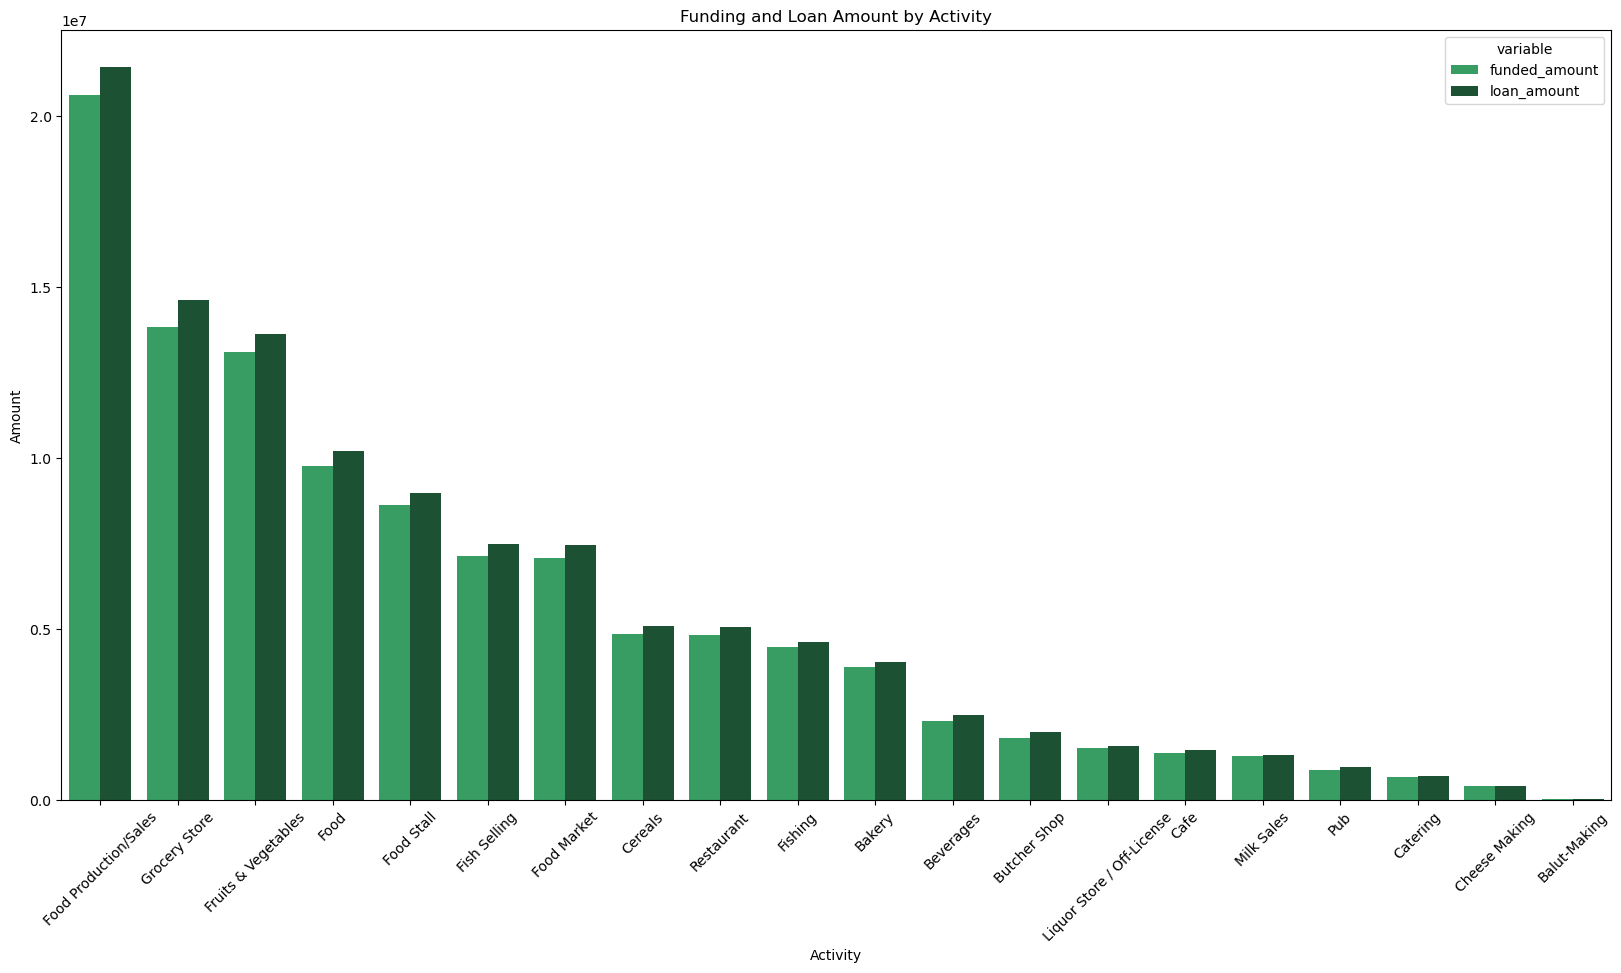

In [258]:
plt.figure(figsize=(20, 10))

sns.barplot(data=act_melt, x='activity', y='value', hue='variable', palette=['#27ae60', '#145a32'])
plt.xticks(rotation=45)
plt.title('Funding and Loan Amount by Activity')
plt.xlabel('Activity')
plt.ylabel('Amount')
plt.show()

### **Funding Ratio Distribution**

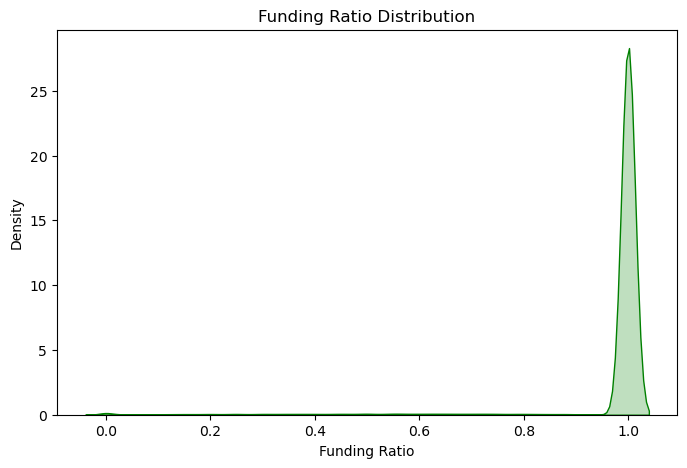

In [230]:
plt.figure(figsize=(8, 5))

sns.kdeplot(kf['funding_ratio'], fill=True, color='green', alpha=0.25)

plt.xlabel('Funding Ratio')
plt.ylabel('Density')
plt.title('Funding Ratio Distribution')

plt.show()

### **Loan Amount vs. Funded Amount**

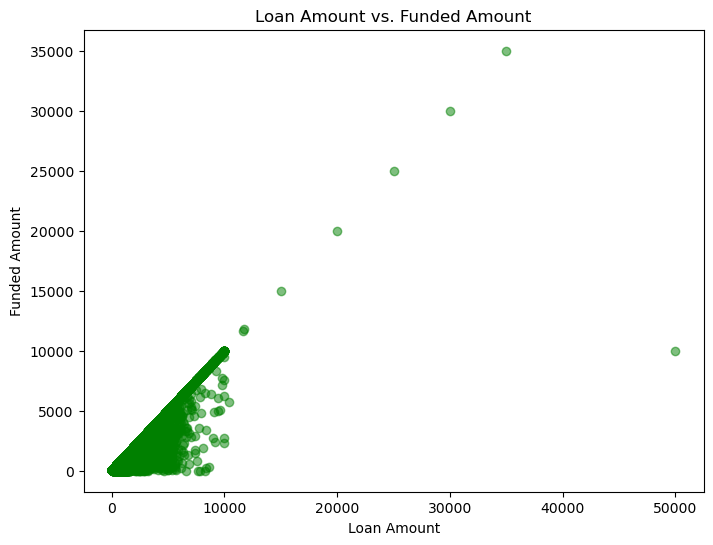

In [231]:
plt.figure(figsize=(8,6))
plt.scatter(kf['loan_amount'], kf['funded_amount'], alpha=0.5, color='green')

plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')
plt.title('Loan Amount vs. Funded Amount')

plt.show()

### **Loan Term Distribution**

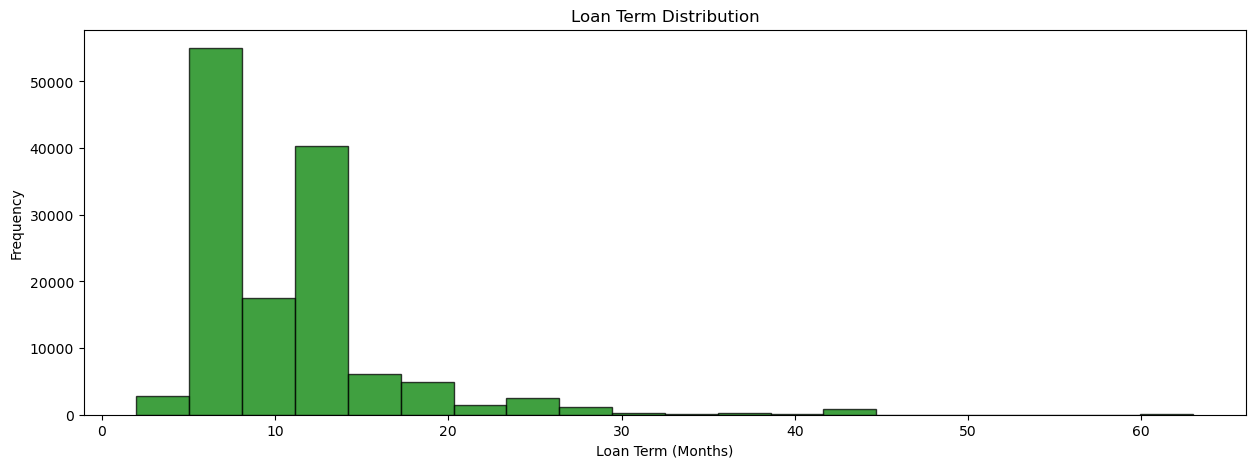

In [233]:
plt.figure(figsize=(15,5))
plt.hist(kf['term_in_months'], bins=20, edgecolor='black', color='green', alpha=0.75)

plt.xlabel('Loan Term (Months)')
plt.ylabel('Frequency')
plt.title('Loan Term Distribution')

plt.show()

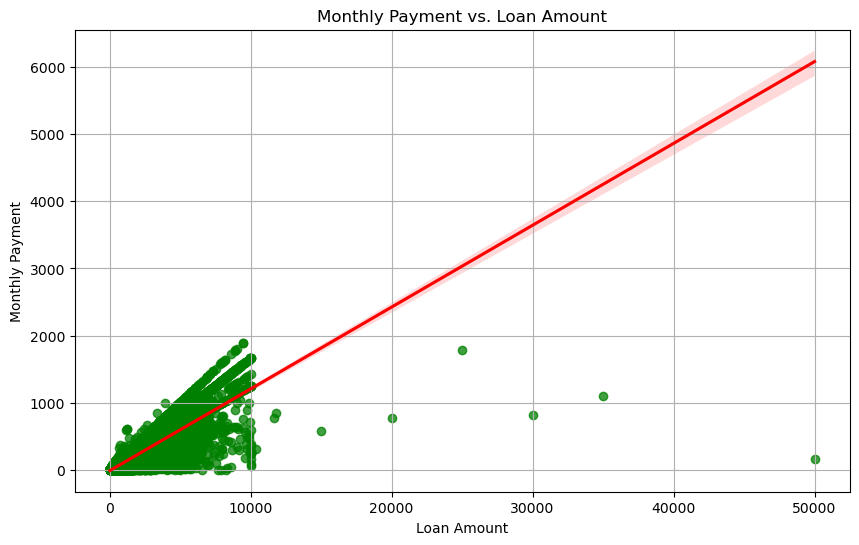

In [251]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x=kf['loan_amount'], 
    y=kf['monthly_payment'], 
    scatter_kws={'color': 'green', 'alpha': 0.75},
    line_kws={'color': 'red'}
)

plt.xlabel('Loan Amount')
plt.ylabel('Monthly Payment')
plt.title('Monthly Payment vs. Loan Amount')

plt.grid(True)
plt.show()


### **Distribution of Days until Disbursement**

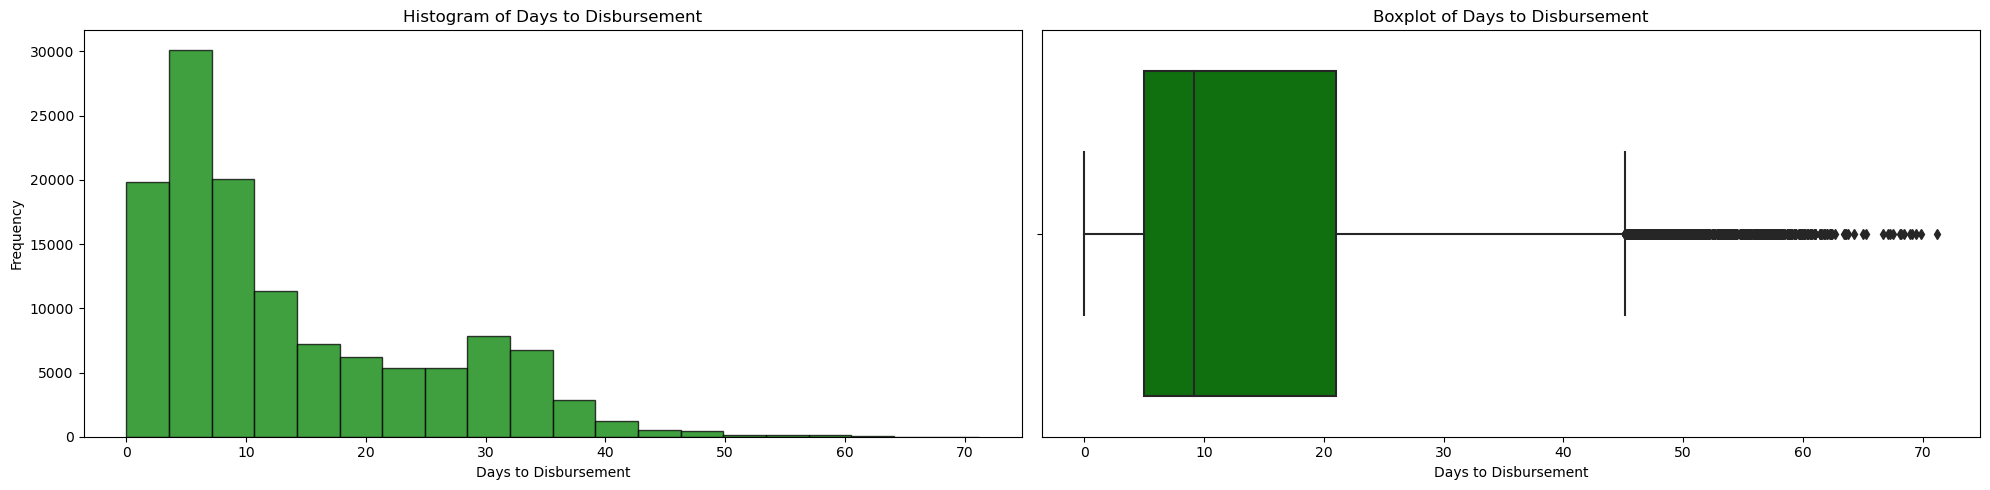

In [237]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(kf['days_to_disbursement'], bins=20, edgecolor='black', alpha=0.75, color='green')
plt.xlabel('Days to Disbursement')
plt.ylabel('Frequency')
plt.title('Histogram of Days to Disbursement')

plt.subplot(1, 2, 2)
sns.boxplot(x=kf['days_to_disbursement'], color='green')
plt.xlabel('Days to Disbursement')
plt.title('Boxplot of Days to Disbursement')

plt.tight_layout()
plt.show()

### **Loan Success & Default Prediction**

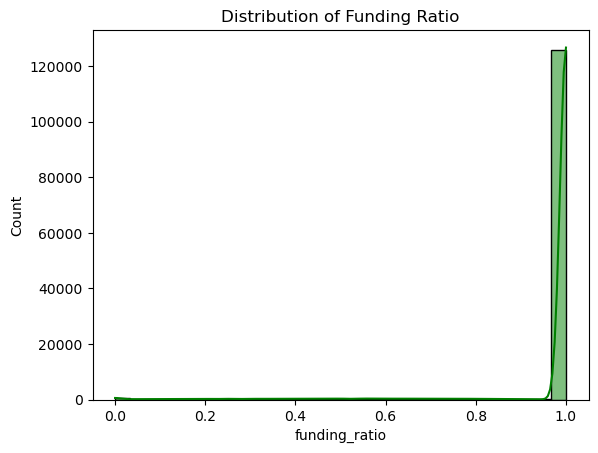

In [238]:
sns.histplot(kf['funding_ratio'], bins=30, kde=True, color='green')
plt.title('Distribution of Funding Ratio')
plt.show()

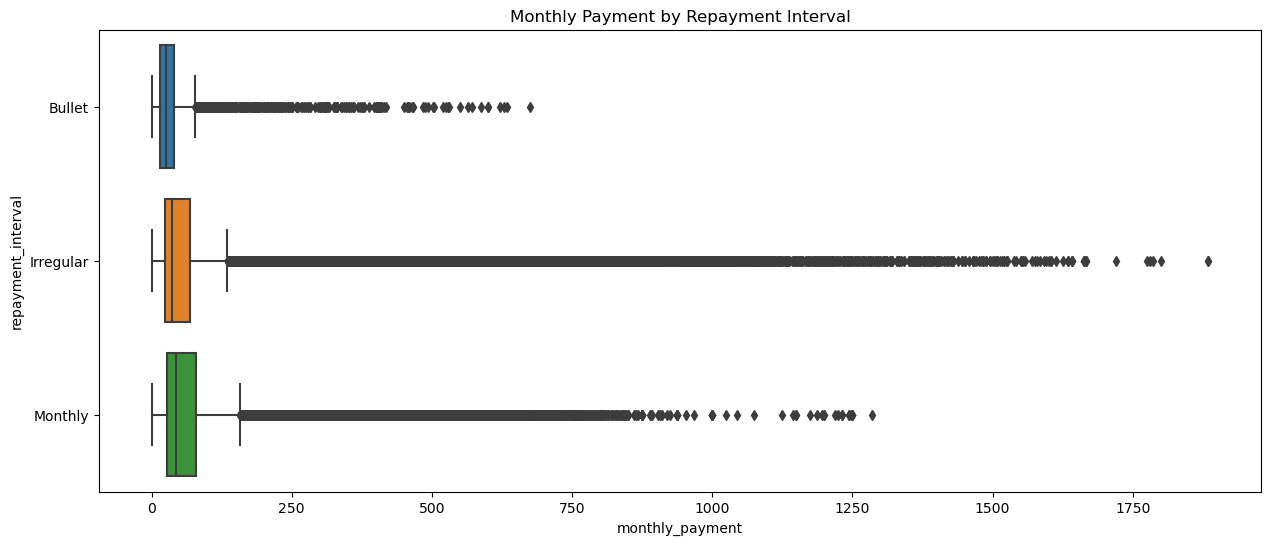

In [60]:
plt.figure(figsize=(15,6))
sns.boxplot(x=kf['monthly_payment'], y=kf['repayment_interval'])
plt.title('Monthly Payment by Repayment Interval')
plt.show()

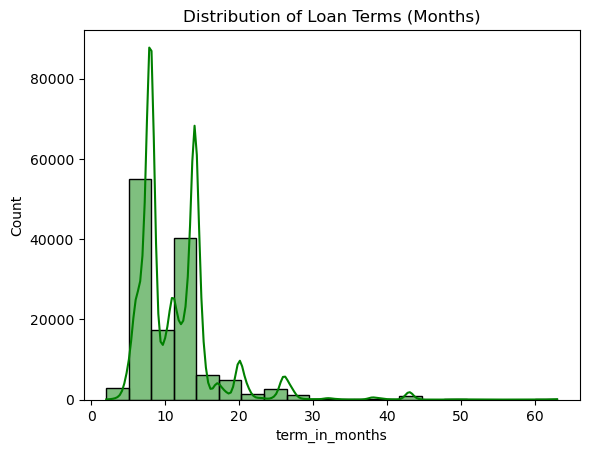

In [239]:
sns.histplot(kf['term_in_months'], bins=20, kde=True, color='green')
plt.title('Distribution of Loan Terms (Months)')
plt.show()

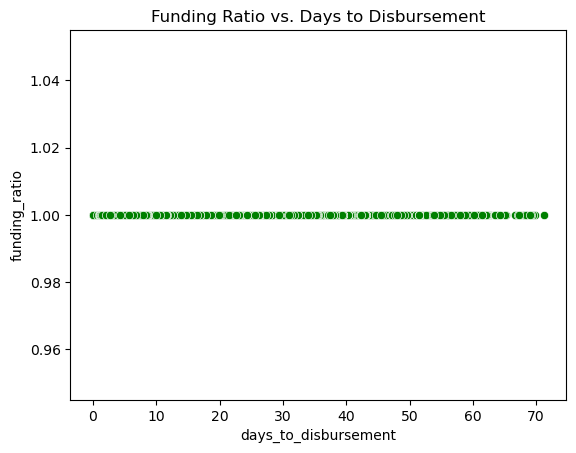

In [240]:
sns.scatterplot(x=kf['days_to_disbursement'], y=kf['funding_ratio'], color='green')
plt.title('Funding Ratio vs. Days to Disbursement')
plt.show()

### **Borrower Demographics & Loan Accessibility**

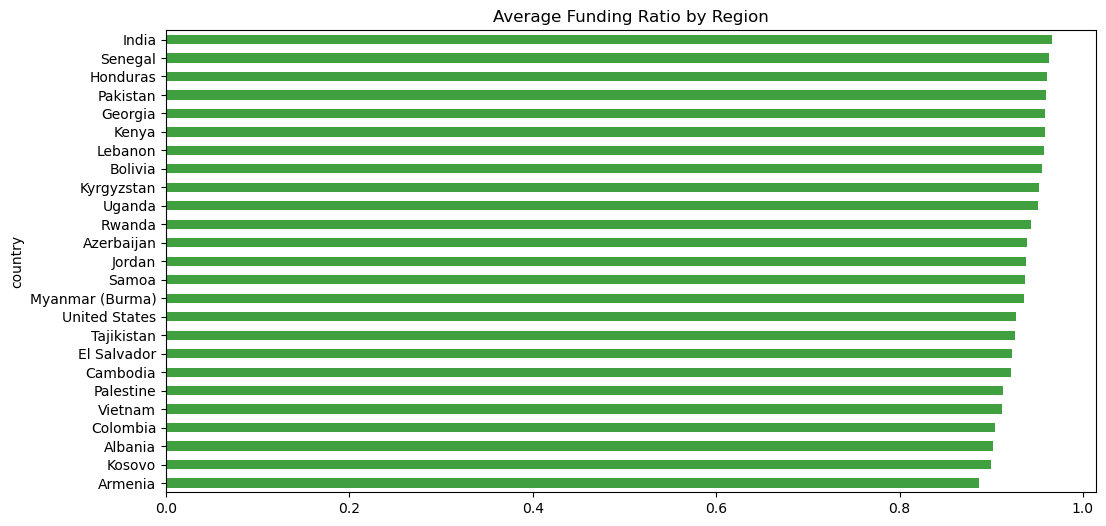

In [243]:
regionAvgFundingRatio = kf.groupby(['country'])['funding_ratio'].mean().sort_values().head(25)
regionAvgFundingRatio.plot(kind='barh', color='green', alpha=0.75, figsize=(12, 6))
plt.title('Average Funding Ratio by Region')
plt.show()

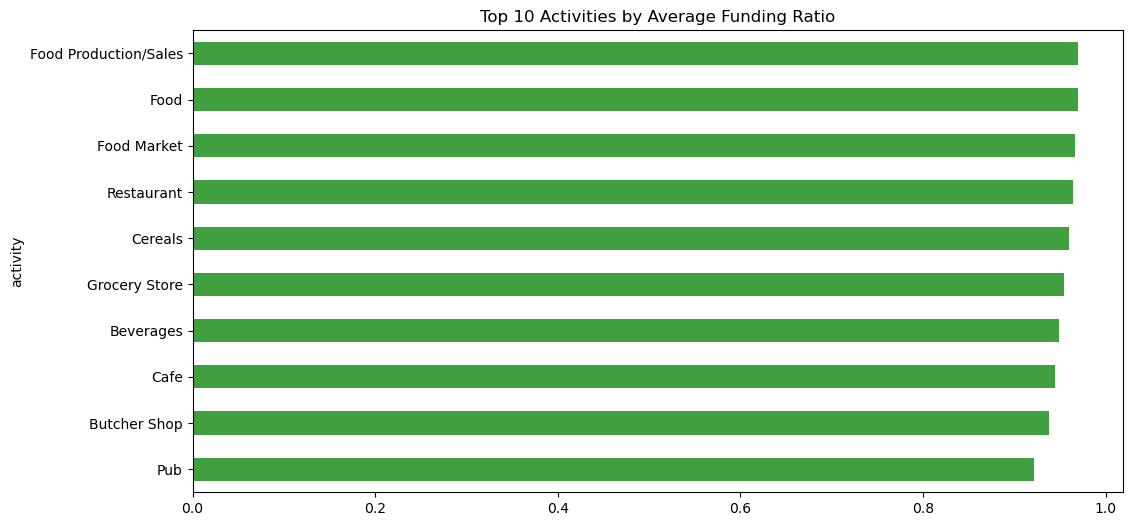

In [242]:
topActivities = kf.groupby(['activity'])['funding_ratio'].mean().sort_values().head(10)
topActivities.plot(kind='barh', color='green', alpha=0.75, figsize=(12, 6))
plt.title('Top 10 Activities by Average Funding Ratio')
plt.show()

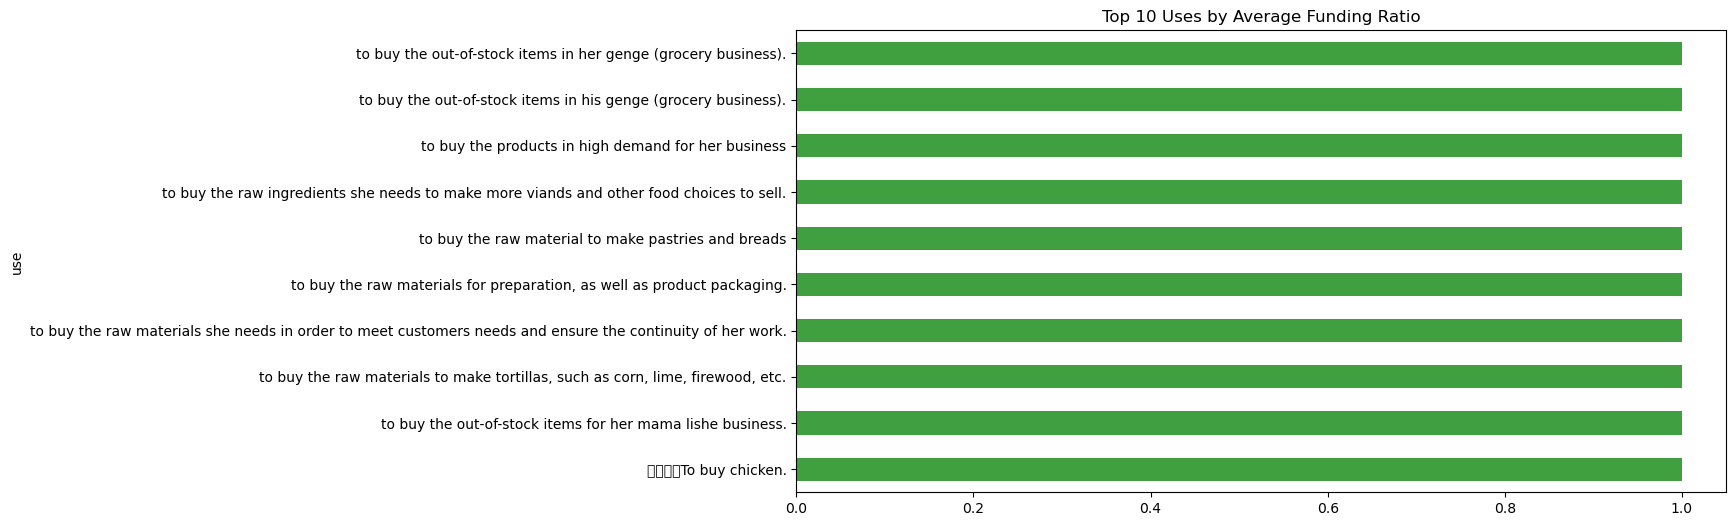

In [244]:
topUses = kf.groupby(['use'])['funding_ratio'].mean().sort_values(ascending=False).head(10)
topUses.plot(kind='barh', color='green', alpha=0.75, figsize=(12, 6))
plt.title('Top 10 Uses by Average Funding Ratio')
plt.show()

### **Loan Market Behavior**

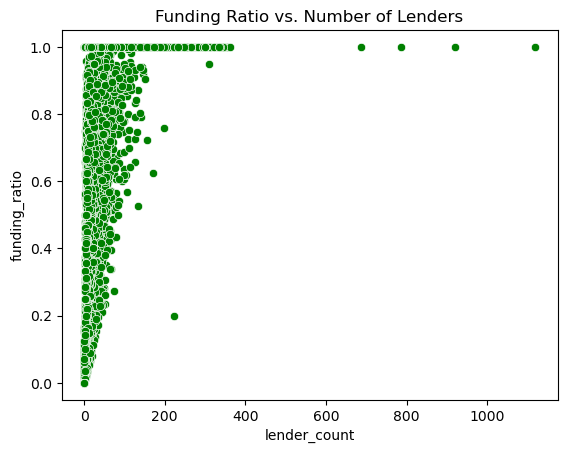

In [245]:
sns.scatterplot(x=kf['lender_count'], y=kf['funding_ratio'], color='green')
plt.title('Funding Ratio vs. Number of Lenders')
plt.show()

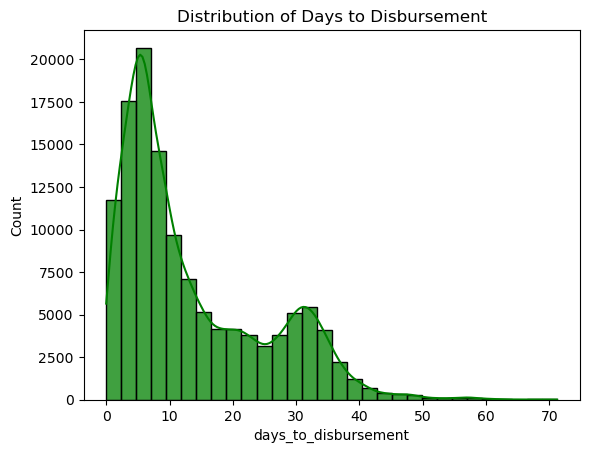

In [247]:
sns.histplot(kf['days_to_disbursement'].dropna(), bins=30, kde=True, color='green', alpha=0.75)
plt.title('Distribution of Days to Disbursement')
plt.show()

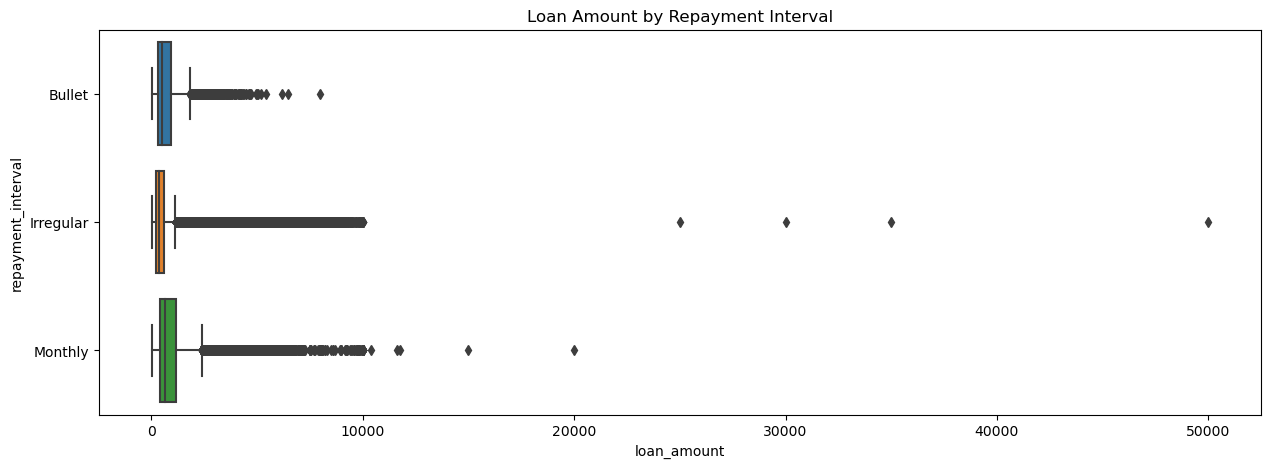

In [68]:
plt.figure(figsize=(15, 5))
sns.boxplot(y=kf['repayment_interval'], x=kf['loan_amount'])
plt.title('Loan Amount by Repayment Interval')
plt.show()

### **Average Contribution Amount**

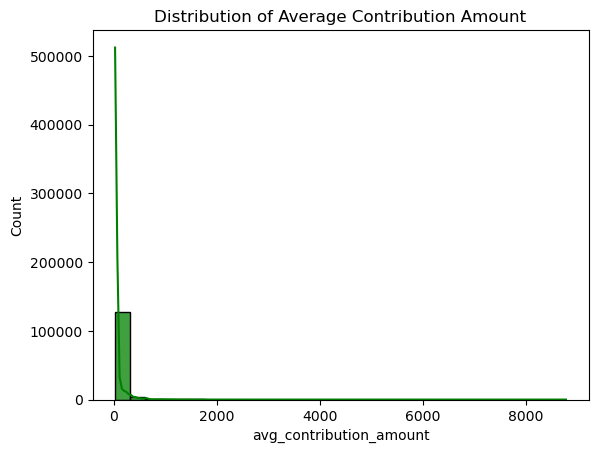

In [248]:
sns.histplot(kf['avg_contribution_amount'], bins=30, kde=True, color='green', alpha=0.75)
plt.title('Distribution of Average Contribution Amount')
plt.show()

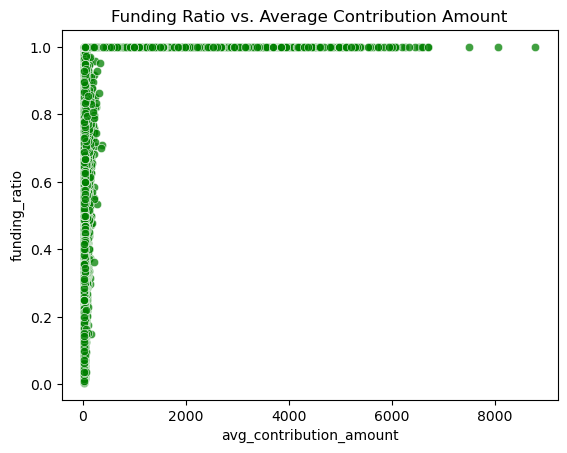

In [249]:
sns.scatterplot(x=kf['avg_contribution_amount'], y=kf['funding_ratio'], color='green', alpha=0.75)
plt.title('Funding Ratio vs. Average Contribution Amount')
plt.show()

### **Investor Behavior & Contribution Analysis**

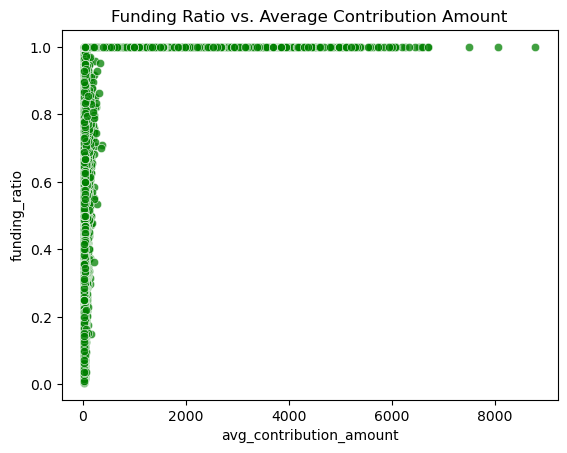

In [250]:
sns.scatterplot(x=kf['avg_contribution_amount'], y=kf['funding_ratio'], color='green', alpha=0.75)
plt.title('Funding Ratio vs. Average Contribution Amount')
plt.show()

In [72]:
kf.head(1)

,country,region,activity,use,repayment_interval,loan_amount,funded_amount,funding_ratio,term_in_months,monthly_payment,lender_count,avg_contribution_amount,posted_time,funded_time,days_to_disbursement
0,Pakistan,Lahore,Fruits & Vegetables,"To buy seasonal, fresh fruits to sell.",Irregular,300.0,300.0,1.0,12.0,25.0,12,25.0,2014-01-01 06:12:39,2014-01-02 10:06:32,1.16


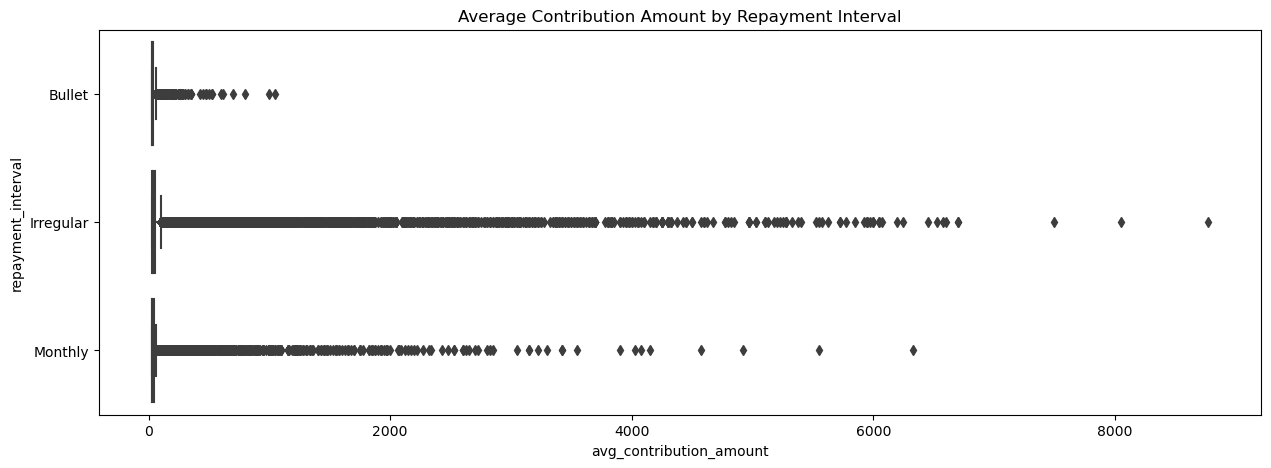

In [73]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=kf['avg_contribution_amount'], y=kf['repayment_interval'])
plt.title('Average Contribution Amount by Repayment Interval')
plt.show()